In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
def compute_J(g1, g2, w1, w2, wr):
    numerator = g1 * g2 * (w1 + w2 - 2 * wr)
    denominator = 2 * (w1 - wr) * (w2 - wr)
    
    # Calculate the exchange coupling J
    J = numerator / denominator
    return J

def zz_strength(J, anharm1, anharm2, w1, w2, drive_strength):
    """Based on Gambetta paper."""
    delta_w1w2 = w1 - w2
    ZZ_static = - (J**2 * (anharm1 + anharm2)) / ((delta_w1w2 + anharm1) * (anharm2 - delta_w1w2))
    ZZ_driven = J**2/2/(anharm1 + delta_w1w2)**2 * ( (anharm1**3 - 2*anharm1*delta_w1w2**2 - 2*delta_w1w2**3)/(anharm1*delta_w1w2**2*(anharm2-delta_w1w2))
          + 1/2*(4*(3*anharm1+delta_w1w2)*(anharm1**2+anharm1*delta_w1w2+delta_w1w2**2)/(delta_w1w2**2*(2*anharm1+delta_w1w2)**2) - 16*delta_w1w2/(3*anharm1**2+8*anharm1*delta_w1w2+4*delta_w1w2**2) )
          + 2*anharm1/(delta_w1w2*anharm2)
          - 2*(anharm1+delta_w1w2)/(anharm1+delta_w1w2-anharm2)**2
          - 2*(anharm1+delta_w1w2)/anharm1/(anharm1+delta_w1w2-anharm2)

         )*drive_strength**2
    return ZZ_static, ZZ_driven

def zx_strength(J, anharm1, w1, w2, drive_strength):
    delta_w1w2 = w1 - w2
    ZX = -J*drive_strength/delta_w1w2*(anharm1/(anharm1+delta_w1w2)) + J*drive_strength**3*anharm1**2*(3*anharm1**3+11*anharm1**2*delta_w1w2+15*anharm1*delta_w1w2**2+9*delta_w1w2**3)/2/delta_w1w2**3/(anharm1+delta_w1w2)**3/(anharm1+2*delta_w1w2)/(3*anharm1+2*delta_w1w2)
    return ZX

def ix_strength(J, anharm1, w1, w2, drive_strength):
    delta_w1w2 = w1 - w2
    IX = -J*drive_strength/(delta_w1w2 + anharm1) + delta_w1w2*anharm1*J*drive_strength**3 / (delta_w1w2+anharm1)**3 / (2*delta_w1w2 + anharm1) / (2*delta_w1w2 + 3*anharm1)
    return IX

In [161]:
g1 = 0.10
g2 = 0.10
anharm1 = -0.220
anharm2 = -0.250
w1 = 5.609
w2 = 5.109
wr = 7.5
drive_strength = 0.07
J = compute_J(g1, g2, w1, w2, wr)
zz_stat, zz_drive = zz_strength(J, anharm1, anharm2, w1, w2, drive_strength)
zz_tot = zz_stat + zz_drive
zx_str = zx_strength(J, anharm1, w1, w2, drive_strength)
quantum_crosstalk = ix_strength(J, anharm1, w1, w2, drive_strength)

print("J = ", J)
print("zz_stat = ", zz_stat)
print("zz_drive = ", zz_drive)
print("zz_tot = ", zz_tot)
print("zx_strength = ", zx_str)
print("quantum_crosstalk = ", quantum_crosstalk)

J =  -0.00473527888934819
zz_stat =  -5.018450997693386e-05
zz_drive =  -5.5631511608448256e-05
zz_tot =  -0.00010581602158538211
zx_strength =  -0.0005497373888157839
quantum_crosstalk =  0.0012145088648373007


In [162]:
Delta = np.linspace(-0.7,0.7, 1000)
zz_stat, zz_drive = zz_strength(J, anharm1, anharm2, w1, w1 + Delta, drive_strength)
zx = zx_strength(J, anharm1, w1, w1 + Delta, drive_strength)

(-0.001, 0.001)

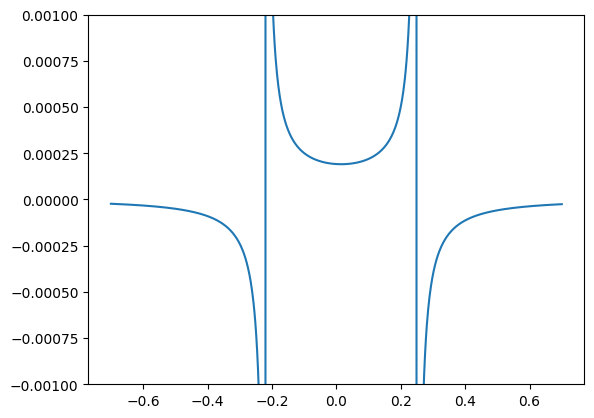

In [163]:
plt.plot(Delta, zz_stat)
plt.ylim([-1e-3, 1e-3])

(-0.01, 0.01)

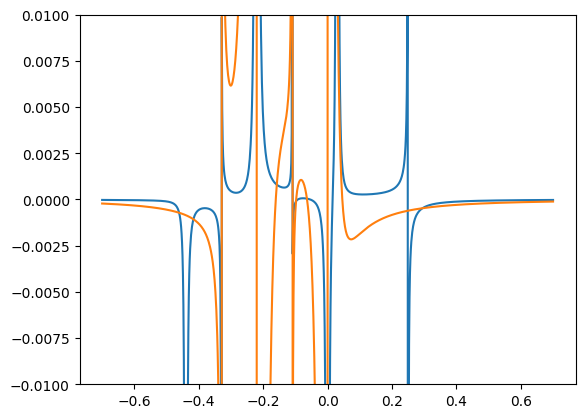

In [164]:
plt.plot(Delta,  zz_stat + zz_drive)
plt.plot(Delta, zx)
plt.ylim([-1e-2, 1e-2])

(-1.0, 1.0)

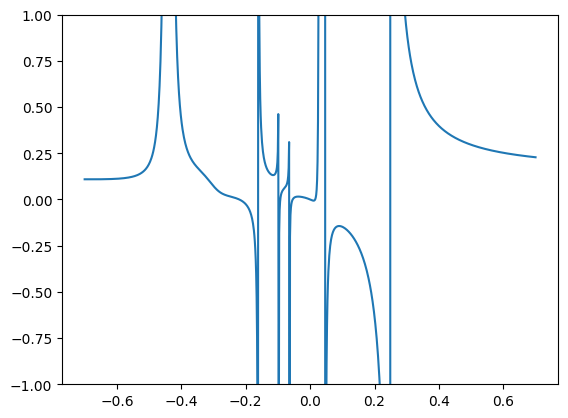

In [165]:
plt.plot(Delta, (zz_stat + zz_drive)/zx)
plt.ylim([-1, 1])